# Carga de los datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

In [10]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [11]:
!kaggle competitions download -c udea-ai4eng-20241

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


# Reconocimiento inicial de los datos, busqueda de nulos y limpieza

In [13]:
train = pd.read_csv('train.csv')
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [14]:
len(train.index)

692500

In [15]:
train.isnull().any()

ID                                False
PERIODO                           False
ESTU_PRGM_ACADEMICO               False
ESTU_PRGM_DEPARTAMENTO            False
ESTU_VALORMATRICULAUNIVERSIDAD     True
ESTU_HORASSEMANATRABAJA            True
FAMI_ESTRATOVIVIENDA               True
FAMI_TIENEINTERNET                 True
FAMI_EDUCACIONPADRE                True
FAMI_TIENELAVADORA                 True
FAMI_TIENEAUTOMOVIL                True
ESTU_PRIVADO_LIBERTAD             False
ESTU_PAGOMATRICULAPROPIO           True
FAMI_TIENECOMPUTADOR               True
FAMI_TIENEINTERNET.1               True
FAMI_EDUCACIONMADRE                True
RENDIMIENTO_GLOBAL                False
dtype: bool

In [16]:
train.isnull().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

In [17]:
clean_df=train.copy()
clean_df=clean_df.dropna()
clean_df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [18]:
clean_df.isnull().sum()

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PRIVADO_LIBERTAD             0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_TIENEINTERNET.1              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
dtype: int64

In [19]:
len(clean_df.index)

628896

# Análisis preliminar

In [20]:
estratos = clean_df.groupby(['FAMI_ESTRATOVIVIENDA']).size()
estratos_df = pd.DataFrame(estratos)
estratos_df.columns=['count']
print(estratos_df)

                       count
FAMI_ESTRATOVIVIENDA        
Estrato 1             105406
Estrato 2             222070
Estrato 3             201661
Estrato 4              62608
Estrato 5              22442
Estrato 6              11899
Sin Estrato             2810


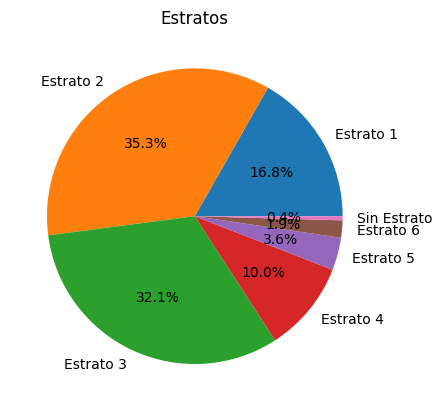

In [21]:
estratos_df.columns=['count']
af=estratos_df.plot.pie(y='count',autopct='%1.1f%%',legend=False)
af.set_title('Estratos')
af.set_ylabel('')
plt.show()

Podemos evidenciar la cantidad de estudiantes por estrato, en forma de conteo y de manera porcentual en el grafico de pastel. Es posible concluir que los estratos 4, 5 y 6 representan menos de un 16% de la población (mismo porcentaje que representan los estudiantes estrato 1 por si solos), mientras los estratos 2 y 3 son los más predominantes.

In [22]:
internet = clean_df.groupby(['FAMI_TIENEINTERNET']).size()
internet_df = pd.DataFrame(internet)
internet_df.columns=['count']
print(internet_df)
compu = clean_df.groupby(['FAMI_TIENECOMPUTADOR']).size()
compu_df = pd.DataFrame(compu)
compu_df.columns=['count']
print(compu_df)

                     count
FAMI_TIENEINTERNET        
No                   68215
Si                  560681
                       count
FAMI_TIENECOMPUTADOR        
No                     53975
Si                    574921


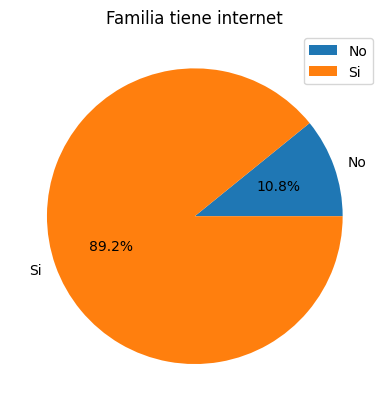

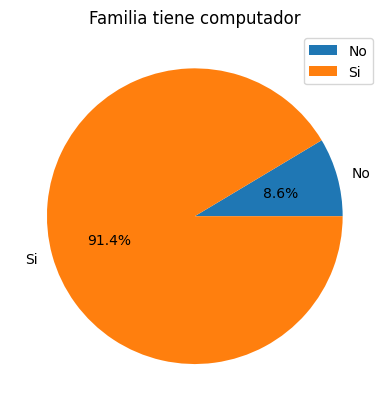

In [23]:
ay=internet_df.plot.pie(y='count',autopct='%1.1f%%')
ay.set_title('Familia tiene internet')
ay.set_ylabel('')
ax=compu_df.plot.pie(y='count',autopct='%1.1f%%')
ax.set_title('Familia tiene computador')
ax.set_ylabel('')
plt.show()

En este segundo gráfico de pastel podemos apreciar que una mayoria considerable (casi un 90%) de los estudiantes de educación superior tienen acceso a una conexión a internet en sus hogares, como era de esperar este porcentaje es superior a la estadistica para la población en egeneral que ronda el 70%, sin embargo es preocupante identificar que un 10.8% de los examinados no cuentan con este recurso a día de hoy vital.

Adicional a esta estadistica, 91.4% de los estudiantes tienen acceso a un compurtador, ya sea familiar o personal, agregando un 1.4% de los estudiantes que aunque no tienen una conexión de internet en sus hogares, tienen capacidad de acceder a contenidos en la red mediante un computrador.

In [24]:
df_pivot = pd.pivot_table(clean_df[['FAMI_ESTRATOVIVIENDA','ESTU_HORASSEMANATRABAJA']],
                          index="FAMI_ESTRATOVIVIENDA",
                          columns="ESTU_HORASSEMANATRABAJA",
                          aggfunc=len, fill_value=0)

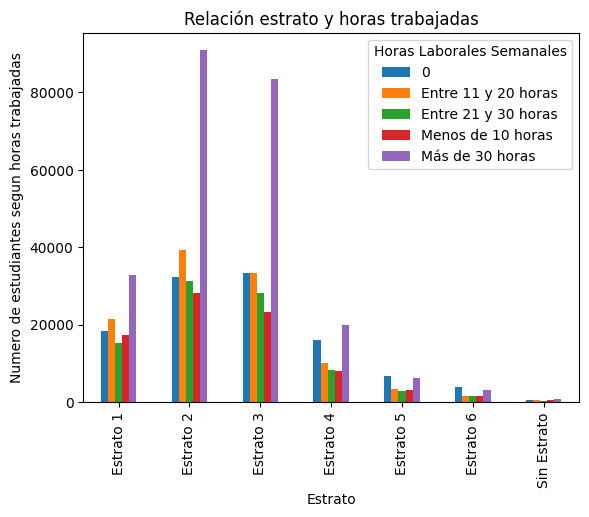

In [25]:
az=df_pivot.plot.bar()
az.set_title('Relación estrato y horas trabajadas')
az.set_ylabel('Numero de estudiantes segun horas trabajadas')
az.set_xlabel('Estrato')
plt.legend(title="Horas Laborales Semanales")
plt.show()

Podemos ver la relación entre el estrato socio-económico y las horas semanales trabajadas de los aplicantes. La mayoria de los estudiantes trabaja más de 30 horas semanales, excepto para los estratos 5 y 6 donde la moda corresponde a los estudiantes que no trabajan.

También podemos ver mayor presencia de trabajos con mayor informalidad (entre 11 y 20 horas) en los estratos 1 y 2, siendo estos la segunda forma de empleo más común para estos grupos demograficos.

# Análisis Rendimiento

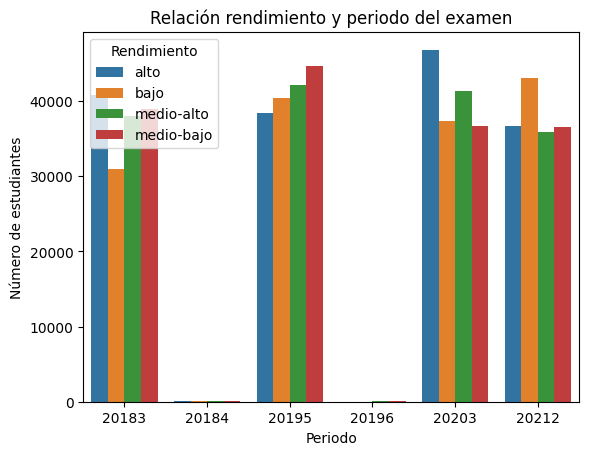

In [26]:
time = clean_df.groupby(['PERIODO','RENDIMIENTO_GLOBAL'])['ID'].count().reset_index()
time['PERIODO'] = time['PERIODO'].astype(str)
sns.barplot(time,x='PERIODO',y='ID',hue='RENDIMIENTO_GLOBAL')
plt.legend(title='Rendimiento')
plt.xlabel('Periodo')
plt.ylabel('Número de estudiantes')
plt.title('Relación rendimiento y periodo del examen')
plt.show()

No se encuentre un patrón claro en los resultados cuando son analizados según el periodo en el cual fue presentado el examen y aunque no existe una diferencia significativa, se evidencia que año a año aumentan la cantidad de estudiantes que participan de estas pruebas de estado, lo cual es congruente con el incremento en la cantidad de estudiantes universitarios registrados en los ultimos años

In [27]:
department = pd.pivot_table(clean_df[['FAMI_ESTRATOVIVIENDA','RENDIMIENTO_GLOBAL']],
                          index="FAMI_ESTRATOVIVIENDA",
                          columns="RENDIMIENTO_GLOBAL",
                          aggfunc=len, fill_value=0)

department.head()

RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,13776,39140,22558,29932
Estrato 2,44439,59178,57219,61234
Estrato 3,57259,40124,54596,49682
Estrato 4,27611,8419,15493,11085
Estrato 5,11960,2491,4843,3148


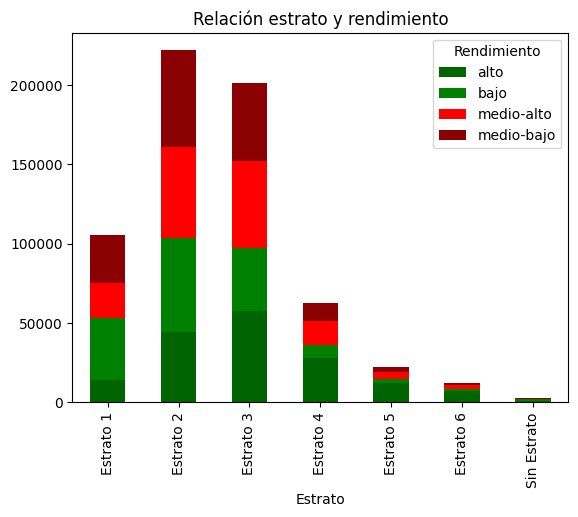

In [28]:
ad=department.plot(kind='bar', stacked=True, color=['darkgreen', 'green', 'red','darkred'])
ad.set_title('Relación estrato y rendimiento')
ad.set_xlabel('Estrato')
plt.legend(title="Rendimiento")
plt.show()

Se evidencia la prevalencia de rendimientos altos en los estratos 4, 5 y 6 (los grupos poblacionales más pequeños) y la precensia de una mayoria de desempeños bajos y medi-bajos en los estratos 1, 2 y 3 (los grupos poblacionales más grandes.

Esos descubrimientos corroboran la hipotesis de la relación entre el estrato y el rendimiento, así como permiten evidenciar que en promedio el país obtiene una mayor cantifdad de resultados negativos, producto en parte de la desigualdad económica

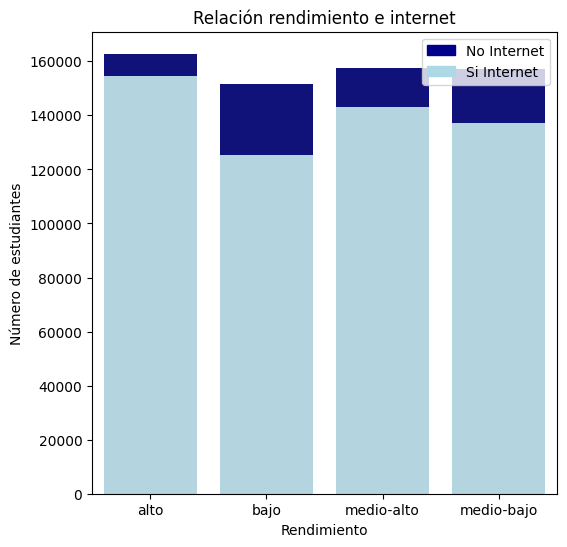

In [29]:
plt.figure(figsize=(6, 6))
total = clean_df.groupby('RENDIMIENTO_GLOBAL')['ID'].count().reset_index()
bar1 = sns.barplot(x="RENDIMIENTO_GLOBAL",  y="ID", data=total, color='darkblue')
si_int=clean_df[clean_df.FAMI_TIENEINTERNET=='Si'].groupby('RENDIMIENTO_GLOBAL')['ID'].count().reset_index()
bar2 = sns.barplot(x="RENDIMIENTO_GLOBAL",  y="ID", data=si_int, color='lightblue')
top_bar = mpatches.Patch(color='darkblue', label='No Internet')
bottom_bar = mpatches.Patch(color='lightblue', label='Si Internet')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Rendimiento')
plt.ylabel('Número de estudiantes')
plt.title('Relación rendimiento e internet')
plt.show()

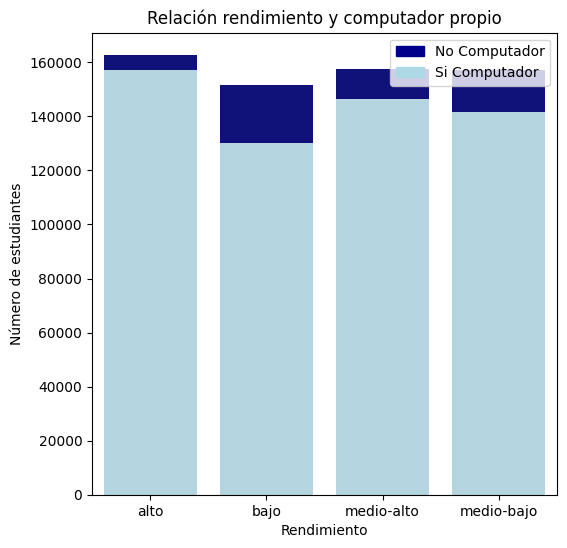

In [30]:
plt.figure(figsize=(6, 6))
total_2 = clean_df.groupby('RENDIMIENTO_GLOBAL')['ID'].count().reset_index()
bar3 = sns.barplot(x="RENDIMIENTO_GLOBAL",  y="ID", data=total_2, color='darkblue')
si_comp=clean_df[clean_df.FAMI_TIENECOMPUTADOR=='Si'].groupby('RENDIMIENTO_GLOBAL')['ID'].count().reset_index()
bar4 = sns.barplot(x="RENDIMIENTO_GLOBAL",  y="ID", data=si_comp, color='lightblue')
top_bar = mpatches.Patch(color='darkblue', label='No Computador')
bottom_bar = mpatches.Patch(color='lightblue', label='Si Computador')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Rendimiento')
plt.ylabel('Número de estudiantes')
plt.title('Relación rendimiento y computador propio')
plt.show()

Vemos en los 2 gráficos anteriores el comportamiento directamente relacionado entre el rendimiento y la existencia de una conexión a internet y computador propio, vemos que como era de esperar la mayoria de aplicantes que no cumplen con esta condición forman parte de las clasificaciones de rendimiento bajo o medio-bajo.

Un hallazgo adicional es la cantidad total de estudiantes por clasificación, permitiendo concluir que aun con la diferencia que genera la presencia de recursos económicos y temporales la mayoria de los estudiantes que presentan la prueba obtienen un desempeño alto (aunque las cantidades son cercanas entre las 4 clasificaciones)